In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

### This work performs principal component analysis on the data and then fits a support vector model 
### and plots the validation curve to visualize its score. 

### Import our data
inpath = "C:/Users/Davis/Downloads/scaledmagicdata.csv"
df = pd.read_csv(inpath)

### Separate target and convert the data to a numpy array (sklearn's PCA likes numpy arrays, and who doesn't?)
Y = df.pop("Class")
X = np.array(df)

### Principal component analysis
pca = PCA(n_components = 7) ### Experimentation showed that keeping the first 7 PCs retains 96% of variance
X_t = pca.fit_transform(X)

### See our explained varance
print(pca.explained_variance_ratio_)

[0.42239909 0.15751879 0.10118053 0.09940127 0.07420194 0.06500865
 0.04075386]


In [2]:
### split into train and test data, with ~1/3 of data reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X_t, Y, test_size = 0.33, random_state=11)

### Now we train the SVM
svc = SVC(random_state = 69)
svc.fit(X_train, y_train)

SVC(random_state=69)

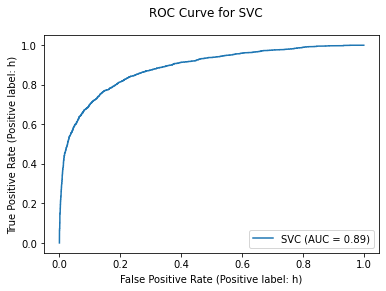

In [3]:
### Plot ROC Curve and see what's what
svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
svc_disp.figure_.suptitle("ROC Curve for SVC")
plt.show()